# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 21 Global Optmization (III)

## 21.1 Simulated Annealing

Simulated Annealing is a very populare optimization algorithm 
because it’s very robust to different types of functions (e.g. no continuity, differentiability or dimensionality requirements) and can find global minima/maxima.

Simulated annealing mimics a phenomenon in nature--the annealing of solid metals--to optimize a complex system. 
Annealing refers to heating a solid and then cooling it slowly. 
Atoms then assume a nearly globally minimum energy state. 
The simulated annealing algorithm simulates a small random displacement of an atom that results in a change in energy. 
- If the change in energy is negative, the energy state of the new configuration is lower and the new configuration is accepted. 
- If the change in energy is positive, the new configuration has a higher energy state may or not be accepted. 

The acceptance rate is according to the Boltzmann probability factor:
$$ P = \exp(\frac{-\Delta E}{kT}) $$


# 21.2 The basic algorithm
Here's a really high-level overview. It skips some very important details, which we'll get to in a moment.

- 1, generate a random solution
- 2, evaluate the objective function
- 3, generate a random neighboring solution
- 4, evluate the objective function for the new solution
- 5, Compare them:
    * 5.1 If Obj(new) < Obj(old): move to the new solution
    * 5.2 If Obj(new) > Obj(old): maybe move to the new solution
- 6 Repeat steps 3-5 above until an acceptable solution is found or you reach some maximum number of iterations.



# 21.3 Application to LJ clusters

To get started, let us firstly copy the code to calculating the energy from Lec_20.

In [2]:
import numpy as np

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))


In order to implement the simulated annealing algorithm, we need to construct three functions:
- 1, generate the neighboring solution based on the current position
- 2, calculate the accepetance rate based on the objective difference
- 3, the actual simulated annealing algorithm

In [3]:
def neighbor(pos_now, kT):
    N = len(pos_now)
    return pos_now + kT*np.random.random_sample((N,))

def acceptance_probability(dE, kT):
    if dE<0:
        return 1
    else:
        return np.exp(-dE/kT)


In [4]:
def simulated_annealling_v1(N_atom=8, Max_iteration=10, kT = 0.05):

    pos_now = init_pos(N_atom)
    obj_now = total_energy(pos_now)
    accept_count = 0

    for i in range(Max_iteration):
        pos_new = neighbor(pos_now, kT)
        obj_new = total_energy(pos_new)
        ap = acceptance_probability(obj_new-obj_now, kT)
        if ap > np.random.random():
            print('accept new energy: ', obj_new, ' acceptance ratio: ', ap)
            obj_now = obj_new
            pos_now = pos_new
            accept_count += 1
    return pos_now, obj_now, accept_count

simulated_annealling_v1(N_atom=5, Max_iteration=20, kT=0.05)

accept new energy:  -1.11125953265  acceptance ratio:  1
accept new energy:  -1.08882279917  acceptance ratio:  0.638435472502
accept new energy:  -1.10643613475  acceptance ratio:  1
accept new energy:  -1.1761128945  acceptance ratio:  1
accept new energy:  -1.16608004105  acceptance ratio:  0.818192967212
accept new energy:  -1.20016035944  acceptance ratio:  1
accept new energy:  -1.25810341607  acceptance ratio:  1
accept new energy:  -1.21495206038  acceptance ratio:  0.42188305939
accept new energy:  -1.17881476977  acceptance ratio:  0.485417558948
accept new energy:  -1.19629250361  acceptance ratio:  1
accept new energy:  -1.12308183378  acceptance ratio:  0.231259829715
accept new energy:  -1.10010833943  acceptance ratio:  0.631618385868
accept new energy:  -1.09072473687  acceptance ratio:  0.828886494942
accept new energy:  -1.01105601756  acceptance ratio:  0.203238647678
accept new energy:  -0.983087932049  acceptance ratio:  0.571573777096
accept new energy:  -1.021148

(array([ 2.68017179,  3.86487653,  2.8101071 ,  2.33004029,  3.13239558,
         1.08801636,  1.29218395,  3.20737945,  2.8449114 ,  1.47300923,
         1.48565449,  3.06883616,  2.6692888 ,  0.73883131,  3.2188816 ]),
 -1.0211486354115968,
 16)

## Quiz
The above code only evaluates the total energy for the given position. As we mentioned,
a better way is to perform local optmization on each position.
How to adapt the code to make it work?

In [17]:
# perform local optmization in SA code
from scipy.optimize import minimize


def simulated_annealling_v2(N_atom=8, Max_iteration=10, kT=0.05):
    pos_now = init_pos(N_atom)
    # -------------Complete your code here -----------
    res = minimize(total_energy, pos_now, method='CG', tol=1e-3)        
    obj_now = res.fun
    # -------------Complete your code here -----------
    accept_count = 0

    for i in range(Max_iteration):
        pos_new = neighbor(pos_now, kT)
        # -------------Complete your code here -----------
        res = minimize(total_energy, pos_new, method='CG', tol=1e-3)        
        obj_new = res.fun
        # -------------Complete your code here -----------
        ap = acceptance_probability(obj_new-obj_now, kT)
        if ap > np.random.random():
            print('accept new energy: ', obj_new, ' acceptance ratio: ', ap)
            obj_now = obj_new
            pos_now = pos_new
            accept_count += 1
    return pos_now, obj_now, accept_count

simulated_annealling_v2(N_atom=6, Max_iteration=50, kT=1.5)

accept new energy:  -12.302927481295068  acceptance ratio:  0.999999975555
accept new energy:  -12.30292752782876  acceptance ratio:  1
accept new energy:  -12.302927528279193  acceptance ratio:  1
accept new energy:  -12.30292747907528  acceptance ratio:  0.999999967197
accept new energy:  -12.302927509809715  acceptance ratio:  1
accept new energy:  -12.302927523341006  acceptance ratio:  1
accept new energy:  -12.302927504463769  acceptance ratio:  0.999999987415
accept new energy:  -12.302927523680125  acceptance ratio:  1
accept new energy:  -12.302927515471008  acceptance ratio:  0.999999994527
accept new energy:  -12.302927503517502  acceptance ratio:  0.999999992031
accept new energy:  -12.302927515562683  acceptance ratio:  1
accept new energy:  -12.302927507204107  acceptance ratio:  0.999999994428
accept new energy:  -12.30292746610433  acceptance ratio:  0.9999999726
accept new energy:  -12.30292752263604  acceptance ratio:  1
accept new energy:  -12.302927526196754  accept

(array([ 20.86644925,  17.4211011 ,  17.27895601,  17.1929823 ,
         15.83571824,  13.55779376,  17.45566149,  18.68676317,
         16.46832245,  17.1258288 ,  15.05986361,  20.50629211,
         16.15067417,  19.95357318,  15.34146391,  14.91772321,
         11.65747541,  19.59647493]), -7.000543428724662, 20)

## 21.4 The factors determing the acceptance rate

By examining this equation of probability function, we should note two thing
- 1. the probability is proportional to temperature--as the solid cools, the probability gets smaller; 
- 2. the probability is inversely proportional to --as the change in energy is larger the probability of accepting the change gets smaller.

The kT term, just as shown in the equation, exactly means the temperature. With higher temperature, the atoms tends to 
fluctuate more and thus could become easier to accept the moves.
As many other global optimization methods, the simulated annealing could also get stuck in the local minima.
The recipe to escape from the local minima is to enhance the fluctuation by increasing the temperature.
### Quiz
Can we always use a very big temperature?

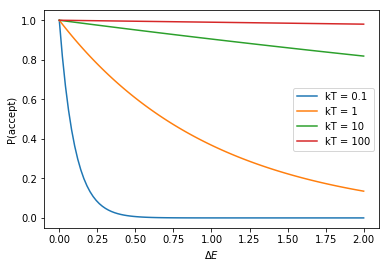

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2,100)
plt.plot(x, np.exp(-x/0.1), label='kT = 0.1')
plt.plot(x, np.exp(-x/1.0), label='kT = 1')
plt.plot(x, np.exp(-x/10.0), label='kT = 10')
plt.plot(x, np.exp(-x/100.0), label='kT = 100')
plt.legend()
plt.xlabel('$\Delta{E}$')
plt.ylabel('P(accept)')
plt.show()


# 21.5 Changing kT in optimization

In [15]:
# perform local optmization in SA code
from scipy.optimize import minimize

def simulated_annealling_v3(N_atom=8, Max_iteration=10, kT=1.0):
    energy_hist = []
    pos_now = init_pos(N_atom)
    res = minimize(total_energy, pos_now, method='CG', tol=1e-3)
    obj_now = res.fun

    for i in range(Max_iteration):
        pos_new = neighbor(pos_now, kT)
        res = minimize(total_energy, pos_new, method='CG', tol=1e-3)        
        obj_new = res.fun
        ap = acceptance_probability(obj_new-obj_now, kT)
        if ap > np.random.random():
            print('accept new energy: ', obj_new, ' acceptance ratio: ', ap)
            obj_now = obj_new
            pos_now = pos_new
        energy_hist.append(obj_now)
    return pos_now, obj_now, energy_hist

pos_min, eng_min, eng_hist = simulated_annealling_v3(N_atom=6, Max_iteration=100, kT=1.0)

accept new energy:  -12.302927509462759  acceptance ratio:  0.999999985151
accept new energy:  -12.302927499289643  acceptance ratio:  0.999999989827
accept new energy:  -12.302927521351986  acceptance ratio:  1
accept new energy:  -12.302927517967849  acceptance ratio:  0.999999996616
accept new energy:  -12.302927509649798  acceptance ratio:  0.999999991682
accept new energy:  -12.3029275145555  acceptance ratio:  1
accept new energy:  -12.302927503597381  acceptance ratio:  0.999999989042
accept new energy:  -12.302927523687542  acceptance ratio:  1
accept new energy:  -12.302927505639172  acceptance ratio:  0.999999981952
accept new energy:  -12.302927508283268  acceptance ratio:  1
accept new energy:  -12.302927517690636  acceptance ratio:  1
accept new energy:  -12.302927518156672  acceptance ratio:  1
accept new energy:  -12.302927514251813  acceptance ratio:  0.999999996095
accept new energy:  -12.302927503106943  acceptance ratio:  0.999999988855
accept new energy:  -12.302927

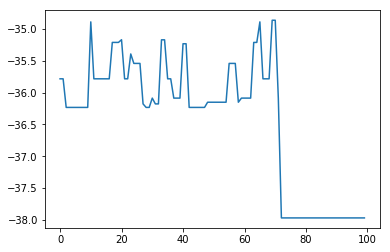

In [19]:
import matplotlib.pyplot as plt

plt.plot(eng_hist)
plt.show()

## 21.6 Project
### Basin Hopping
Basin-hopping is a stochastic algorithm which attempts to find the global minimum of a smooth scalar function of one or more variables. The algorithm in its current form was described by David Wales and Jonathan Doye [R189] http://www-wales.ch.cam.ac.uk/.

It has been implemented in scipy. To use it, one just need to do the following.

```python
from scipy.optimize import basinhopping

N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)
```

The algorithm is very easy to implement. Here is another example.
https://gitlab.com/ase/ase/blob/master/ase/optimize/basin.py

### Project (by Nov. 28, 2017)

Please use basin hopping method to find all the ground states for LJ clusters for (N=10-20).

Try to 
- 1, choose three numbers bewteen 10 - 20
- 2, find the parameters which could lead to the global minimum.
- 3, plot the energy evolutions as a function of steps.
